Дифракция Френеля на щели

In [ ]:
import numpy as np
x = np.array([51.70, 52.60, 53.00, 53.20, 53.40])
x_start = 54.00
for i in range(len(x)):
    x[i] = x_start - x[i]
print(1/x)


[0.43478261 0.71428571 1.         1.25       1.66666667]


In [12]:
lyambda = 54.61*10**(-6) #см
two_ksi = np.zeros(5)
m = np.array([2, 3, 4, 5, 6])
for i in range(len(x)):
    two_ksi = 2 * np.sqrt(m*x*lyambda) * 10**4
print(two_ksi)
sigma_z = np.sqrt(2) * 0.1 #см
sigma_1_z = np.zeros(5)
for i in range(5):
    sigma_1_z = (1/x**2) * sigma_z
sigma_2ksi = np.zeros(5)
for i in range(5):
    sigma_2ksi = 10**4 * np.sqrt(m*lyambda)*sigma_z / np.sqrt(x)
print(sigma_1_z)

[316.98958973 302.89404088 295.59431659 295.59431659 280.42539115]
[0.02673372 0.07215375 0.14142136 0.22097087 0.3928371 ]


реализация chi_square

Оптимальные параметры:
k = 0.2453 ± 0.0410
b = -0.0534 ± 0.0949
Полученное χ² = 1.000
b_exp = 0.030


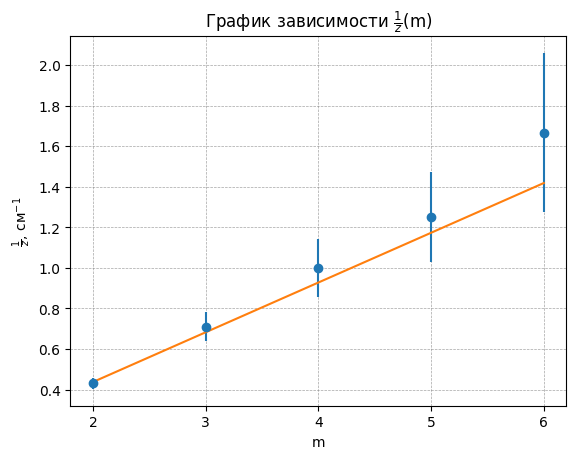

In [40]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Данные
x_data = np.array([2, 3, 4, 5, 6])
y_data = np.array([0.43, 0.71, 1, 1.25, 1.667])
sigma_data = np.array([0.027, 0.072, 0.141, 0.221, 0.393])  # ошибки измерений y

# Функция для вычисления хи-квадрат
def chi_squared(params):
    k, b = params
    y_model = k * x_data + b
    return np.sum(((y_data - y_model) / sigma_data)**2)

# Функция для минимизации
def target_function(params):
    return abs(chi_squared(params) - 1)

# Начальные значения
initial_guess = [1.0, 0.0]  # k=1, b=0

# Оптимизация
result = minimize(target_function, initial_guess, method='Nelder-Mead')

# Полученные параметры
k_opt, b_opt = result.x
chi2_opt = chi_squared([k_opt, b_opt])

# Вычисление ковариационной матрицы для оценки погрешностей
residuals = y_data - (k_opt * x_data + b_opt)
jacobian = np.column_stack((x_data, np.ones_like(x_data)))  # df/dk = x, df/db = 1
weights = 1.0 / sigma_data**2
cov_matrix = np.linalg.inv(jacobian.T @ (weights[:, None] * jacobian))
k_error = np.sqrt(cov_matrix[0, 0])
b_error = np.sqrt(cov_matrix[1, 1])

print(f"Оптимальные параметры:")
print(f"k = {k_opt:.4f} ± {k_error:.4f}")
print(f"b = {b_opt:.4f} ± {b_error:.4f}")
print(f"Полученное χ² = {chi2_opt:.3f}")
lyambda = 54.61*10**(-6) #см
b_exp = np.sqrt(4 * lyambda / k_opt)
print(f"b_exp = {b_exp:.3f}")
plt.errorbar(x_data, y_data, sigma_1_z, fmt="o")
plt.plot(x_data, k_opt * x_data + b_opt)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)    
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.gca().yaxis.set_major_locator(MultipleLocator(0.2))
plt.title(r"График зависимости $\frac{1}{z}$(m)")
plt.xlabel("m")
plt.ylabel(r"$\frac{1}{z}$, см$^{-1}$")
plt.show()